# Name: Vamsi Krishna Bunga
## Net ID: vb2279

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import keras
import sys
import h5py
import warnings
from tqdm import tqdm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Clone the repository CSAW-HackML-2020 for model. <br>
Install gdown module so that we can download the files from google drive

In [2]:
!git clone https://github.com/csaw-hackml/CSAW-HackML-2020.git
!ls CSAW-HackML-2020/lab3/models
!conda install -y gdown



Cloning into 'CSAW-HackML-2020'...
remote: Enumerating objects: 220, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 220 (delta 37), reused 17 (delta 17), pack-reused 178
Receiving objects: 100% (220/220), 83.78 MiB | 22.94 MiB/s, done.
Resolving deltas: 100% (83/83), done.
bd_net.h5  bd_weights.h5
Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.11.17 |    

Downloading data files from my google drive

In [3]:
!gdown --id 1x6VZhZZurcT_qNyVUEwWRJ7x42KH0iX0
!gdown --id 1asgft2RTixcRsDGfd7Bam3rHAeXVKRCE
!gdown --id 1JplYjncG9OJp7NJx1FQcRoAW2dfFM84Y
!gdown --id 14xyiaY88KiAcSj4qanvm0KtXWMCVd3W-

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1x6VZhZZurcT_qNyVUEwWRJ7x42KH0iX0
From (redirected): https://drive.google.com/uc?id=1x6VZhZZurcT_qNyVUEwWRJ7x42KH0iX0&confirm=t&uuid=93f7afcd-26b0-4e49-b617-59eec31aa1cd
To: /kaggle/working/valid.h5
100%|█████████████████████████████████████████| 716M/716M [00:04<00:00, 153MB/s]
/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1asgft2RTixcRsDGfd7Bam3rHAeXVKRCE
From (redirected): https://drive.google.com/uc?id=1asgft2RTixcRsDGfd7Bam3rHAeXVKRCE&confirm=t&uuid=81d20153-f719-4d28-a6c8-4abe2

In [4]:
!ls
!ls CSAW-HackML-2020/lab3/models

CSAW-HackML-2020  bd_test.h5  bd_valid.h5  test.h5  valid.h5
bd_net.h5  bd_weights.h5


In [5]:


# File names
clean_dataset_path = 'valid.h5'
poisoned_dataset_path = 'bd_valid.h5'

# Test dataset file names
test_clean_dataset_path = 'test.h5'
test_poisoned_dataset_path = 'bd_test.h5'

# Model file name
neural_network_model_path = 'CSAW-HackML-2020/lab3/models/bd_net.h5'
highest_clean_accuracy = 0

def load_dataset(file_path):
    dataset = h5py.File(file_path, 'r')
    images = np.array(dataset['data'])
    labels = np.array(dataset['label'])
    images = images.transpose((0,2,3,1))

    return images, labels

def evaluate_model():
    clean_test_images, clean_test_labels = load_dataset(clean_dataset_path)
    poisoned_test_images, poisoned_test_labels = load_dataset(poisoned_dataset_path)

    trained_model = keras.models.load_model(neural_network_model_path)

    clean_predictions = np.argmax(trained_model.predict(clean_test_images), axis=1)
    accuracy_on_clean = np.mean(np.equal(clean_predictions, clean_test_labels)) * 100
    print('Accuracy on Clean Data:', accuracy_on_clean)
    
    global highest_clean_accuracy
    highest_clean_accuracy = accuracy_on_clean

    poisoned_predictions = np.argmax(trained_model.predict(poisoned_test_images), axis=1)
    attack_success_rate = np.mean(np.equal(poisoned_predictions, poisoned_test_labels)) * 100
    print('Attack Success Rate:', attack_success_rate)





In [6]:
evaluate_model()

trained_neural_network = keras.models.load_model(neural_network_model_path)
print(trained_neural_network.summary())



361/361 [==============================] - 6s 2ms/step
Accuracy on Clean Data: 98.64899974019225
361/361 [==============================] - 1s 2ms/step
Attack Success Rate: 100.0
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 55, 47, 3)]          0         []                            
                                                                                                  
 conv_1 (Conv2D)             (None, 52, 44, 20)           980       ['input[0][0]']               
                                                                                                  
 pool_1 (MaxPooling2D)       (None, 26, 22, 20)           0         ['conv_1[0][0]']              
                                                                                                  
 conv_2 (Con

## Displaying Clean Data:

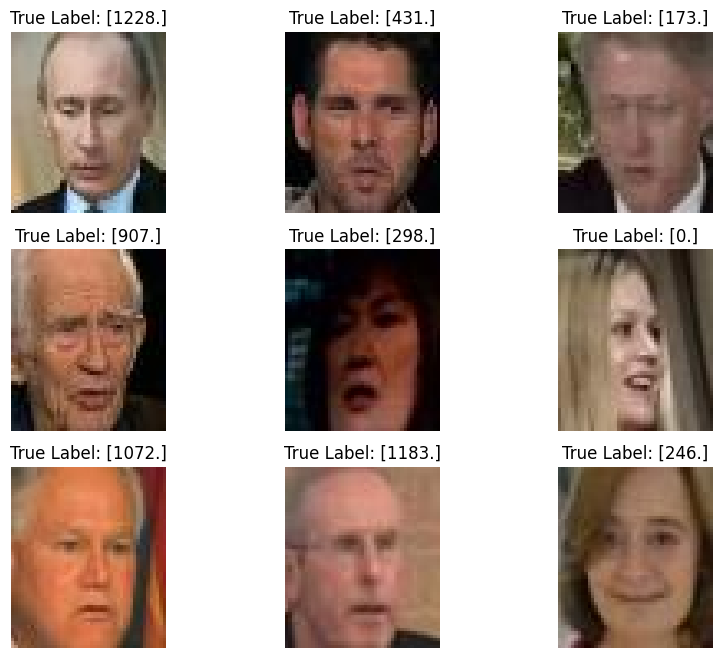

In [7]:
clean_images, clean_labels = load_dataset(clean_dataset_path)

clean_figure = plt.figure(figsize=(10, 8))
columns, rows = 3, 3

# Displaying clean images
for i in range(1, columns * rows + 1):
    random_index = np.random.randint(clean_images.shape[0], size=1)
    image, label = clean_images[random_index], clean_labels[random_index]
    clean_figure.add_subplot(rows, columns, i)
    plt.title(f"True Label: {label}")
    plt.axis("off")
    plt.imshow(image[0] / 255)
plt.show()



## Displaying Piosoned Data:

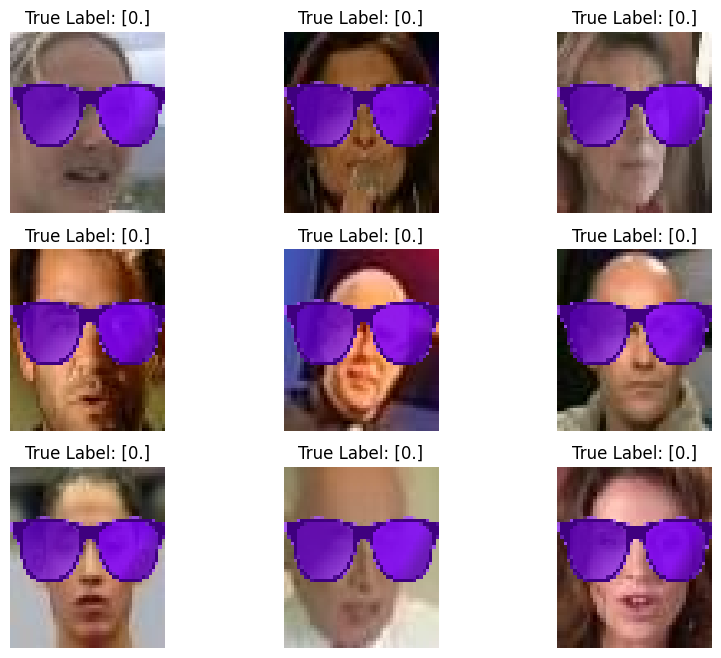

In [8]:
# Loading poisoned data
poisoned_images, poisoned_labels = load_dataset(poisoned_dataset_path)

poisoned_figure = plt.figure(figsize=(10, 8))

# Displaying poisoned images
for i in range(1, columns * rows + 1):
    random_index = np.random.randint(poisoned_images.shape[0], size=1)
    image, label = poisoned_images[random_index], poisoned_labels[random_index]
    poisoned_figure.add_subplot(rows, columns, i)
    plt.title(f"True Label: {label}")
    plt.axis("off")
    plt.imshow(image[0] / 255)
plt.show()

# Clearing Keras session as it is causing RAM issues.
keras.backend.clear_session()



## Clear RAM so that the notebook does not crash.


In [9]:
from tensorflow.keras import backend as K
K.clear_session()
import gc
gc.collect()

3621

## Pruning
We will prune the model now. We get the activation of last pooling layer and start pruning one channel at a time. We have 60 channels.


In [10]:
# Load clean and poisoned data
clean_images, clean_labels = load_dataset(clean_dataset_path)
poisoned_images, poisoned_labels = load_dataset(poisoned_dataset_path)
import gc


# Set initial model accuracy and saved accuracy
current_clean_accuracy = highest_clean_accuracy
initial_clean_accuracy = highest_clean_accuracy
# Clone the original model
cloned_model = keras.models.clone_model(trained_neural_network)
cloned_model.set_weights(trained_neural_network.get_weights()) 

# Initialize variables
channels_to_prune = []
accuracy_on_clean_data = []
attack_success_rates = []
model_saved_flags = np.zeros(3, dtype=bool)

# Getting activation from 'pool_3'
pool_3_output = cloned_model.get_layer('pool_3').output
activation_model = keras.models.Model(inputs=cloned_model.input, outputs=pool_3_output)
activation_output = activation_model.predict(clean_images)  
average_activation = np.mean(activation_output, axis=(0, 1, 2))
sorted_indices = np.argsort(average_activation)

layer_weights = cloned_model.layers[5].get_weights()[0]
layer_bias = cloned_model.layers[5].get_weights()[1]

for channel in tqdm(sorted_indices):
    layer_weights[:, :, :, channel] = 0
    layer_bias[channel] = 0
    cloned_model.layers[5].set_weights([layer_weights, layer_bias])

    predicted_labels = np.argmax(cloned_model.predict(clean_images), axis=1)
    model_accuracy = np.mean(np.equal(predicted_labels, clean_labels)) * 100
    
    # Check accuracy drop and save models
    accuracy_drop = initial_clean_accuracy - model_accuracy
    if accuracy_drop >= 2 and not model_saved_flags[0]:
        cloned_model.save('model_Drop=2.h5')
        model_saved_flags[0] = True
    if accuracy_drop >= 4 and not model_saved_flags[1]:
        cloned_model.save('model_Drop=4.h5')
        model_saved_flags[1] = True
    if accuracy_drop >= 10 and not model_saved_flags[2]:
        cloned_model.save('model_Drop=10.h5')
        model_saved_flags[2] = True
    
    accuracy_on_clean_data.append(model_accuracy)
    poisoned_predictions = np.argmax(cloned_model.predict(poisoned_images), axis=1)
    asr = np.mean(np.equal(poisoned_predictions, poisoned_labels)) * 100
    attack_success_rates.append(asr)

    # Print current status
    print(f"The clean accuracy is: {model_accuracy}")
    print(f"The attack success rate is: {asr}")
    print(f"The pruned channel index is: {channel}")

    keras.backend.clear_session()
    gc.collect()


361/361 [==============================] - 1s 2ms/step


  0%|          | 0/60 [00:00<?, ?it/s]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 0


  2%|▏         | 1/60 [00:04<04:19,  4.41s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 26


  3%|▎         | 2/60 [00:08<04:18,  4.45s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 27


  5%|▌         | 3/60 [00:13<04:14,  4.46s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 30


  7%|▋         | 4/60 [00:17<04:09,  4.46s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 31


  8%|▊         | 5/60 [00:22<04:06,  4.48s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 33


 10%|█         | 6/60 [00:26<04:01,  4.47s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 34


 12%|█▏        | 7/60 [00:31<03:58,  4.50s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 36


 13%|█▎        | 8/60 [00:35<03:53,  4.48s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 37


 15%|█▌        | 9/60 [00:40<03:48,  4.48s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 38


 17%|█▋        | 10/60 [00:44<03:43,  4.47s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 25


 18%|█▊        | 11/60 [00:49<03:39,  4.49s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 39


 20%|██        | 12/60 [00:53<03:36,  4.51s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 41


 22%|██▏       | 13/60 [00:58<03:32,  4.51s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 44


 23%|██▎       | 14/60 [01:02<03:27,  4.52s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 45


 25%|██▌       | 15/60 [01:07<03:22,  4.50s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 47


 27%|██▋       | 16/60 [01:11<03:17,  4.49s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 48


 28%|██▊       | 17/60 [01:16<03:12,  4.47s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 49


 30%|███       | 18/60 [01:20<03:07,  4.47s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 50


 32%|███▏      | 19/60 [01:25<03:03,  4.48s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 53


 33%|███▎      | 20/60 [01:29<03:00,  4.51s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 55


 35%|███▌      | 21/60 [01:34<02:55,  4.50s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 40


 37%|███▋      | 22/60 [01:38<02:50,  4.49s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 24


 38%|███▊      | 23/60 [01:43<02:45,  4.47s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 59


 40%|████      | 24/60 [01:47<02:40,  4.47s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 9


 42%|████▏     | 25/60 [01:52<02:36,  4.47s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 2


 43%|████▎     | 26/60 [01:56<02:33,  4.51s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 12


 45%|████▌     | 27/60 [02:01<02:29,  4.52s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 13


 47%|████▋     | 28/60 [02:05<02:24,  4.51s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 17


 48%|████▊     | 29/60 [02:10<02:19,  4.51s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 14


 50%|█████     | 30/60 [02:14<02:14,  4.49s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 15


 52%|█████▏    | 31/60 [02:19<02:10,  4.48s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 23


 53%|█████▎    | 32/60 [02:23<02:05,  4.48s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 6


 55%|█████▌    | 33/60 [02:28<02:01,  4.50s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64033948211657
The attack success rate is: 100.0
The pruned channel index is: 51


 57%|█████▋    | 34/60 [02:32<01:57,  4.51s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64033948211657
The attack success rate is: 100.0
The pruned channel index is: 32


 58%|█████▊    | 35/60 [02:37<01:52,  4.49s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.63167922404088
The attack success rate is: 100.0
The pruned channel index is: 22


 60%|██████    | 36/60 [02:41<01:47,  4.48s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.65765999826795
The attack success rate is: 100.0
The pruned channel index is: 21


 62%|██████▏   | 37/60 [02:46<01:42,  4.48s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.64899974019225
The attack success rate is: 100.0
The pruned channel index is: 20


 63%|██████▎   | 38/60 [02:50<01:38,  4.47s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.6056984498138
The attack success rate is: 100.0
The pruned channel index is: 19


 65%|██████▌   | 39/60 [02:54<01:33,  4.47s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.57105741751104
The attack success rate is: 100.0
The pruned channel index is: 43


 67%|██████▋   | 40/60 [02:59<01:30,  4.52s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.53641638520828
The attack success rate is: 100.0
The pruned channel index is: 58


 68%|██████▊   | 41/60 [03:04<01:26,  4.53s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 98.19000606218066
The attack success rate is: 100.0
The pruned channel index is: 3


 70%|███████   | 42/60 [03:08<01:21,  4.52s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 97.65307006148784
The attack success rate is: 100.0
The pruned channel index is: 42


 72%|███████▏  | 43/60 [03:13<01:16,  4.49s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 97.50584567420108
The attack success rate is: 100.0
The pruned channel index is: 1


 73%|███████▎  | 44/60 [03:17<01:11,  4.48s/it]

361/361 [==============================] - 1s 2ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 95.75647354291158
The attack success rate is: 100.0
The pruned channel index is: 29


 75%|███████▌  | 45/60 [03:21<01:07,  4.48s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 95.20221702606739
The attack success rate is: 99.9913397419243
The pruned channel index is: 16


 77%|███████▋  | 46/60 [03:26<01:02,  4.46s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 94.7172425738287
The attack success rate is: 99.9913397419243
The pruned channel index is: 56


 78%|███████▊  | 47/60 [03:31<00:58,  4.51s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 92.09318437689443
The attack success rate is: 99.9913397419243
The pruned channel index is: 46


 80%|████████  | 48/60 [03:35<00:54,  4.53s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 91.49562656967177
The attack success rate is: 99.9913397419243
The pruned channel index is: 5


 82%|████████▏ | 49/60 [03:40<00:49,  4.51s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 91.01931237550879
The attack success rate is: 99.98267948384861
The pruned channel index is: 8


 83%|████████▎ | 50/60 [03:44<00:44,  4.50s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 89.17467740538669
The attack success rate is: 80.73958603966398
The pruned channel index is: 11


 85%|████████▌ | 51/60 [03:49<00:40,  4.50s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 84.43751623798389
The attack success rate is: 77.015675067117
The pruned channel index is: 54


 87%|████████▋ | 52/60 [03:53<00:36,  4.52s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 76.48739932449988
The attack success rate is: 35.71490430414826
The pruned channel index is: 10


 88%|████████▊ | 53/60 [03:58<00:31,  4.51s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 54.8627349095003
The attack success rate is: 6.954187234779596
The pruned channel index is: 28


 90%|█████████ | 54/60 [04:02<00:27,  4.54s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 27.08928726076037
The attack success rate is: 0.4243526457088421
The pruned channel index is: 35


 92%|█████████▏| 55/60 [04:07<00:22,  4.57s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 13.87373343725643
The attack success rate is: 0.0
The pruned channel index is: 18


 93%|█████████▎| 56/60 [04:11<00:18,  4.55s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 7.101411622066338
The attack success rate is: 0.0
The pruned channel index is: 4


 95%|█████████▌| 57/60 [04:16<00:13,  4.53s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 1.5501861955486274
The attack success rate is: 0.0
The pruned channel index is: 7


 97%|█████████▋| 58/60 [04:20<00:09,  4.52s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 0.7188014202823244
The attack success rate is: 0.0
The pruned channel index is: 52


 98%|█████████▊| 59/60 [04:25<00:04,  4.50s/it]

361/361 [==============================] - 1s 2ms/step
The clean accuracy is: 0.0779423226812159
The attack success rate is: 0.0
The pruned channel index is: 57


100%|██████████| 60/60 [04:29<00:00,  4.50s/it]


We can see that the pruning defence is not good as it is also affecting the accuracy.

Text(0.5, 1.0, 'Accuracy and Attack Success Rate over Pruned Channels')

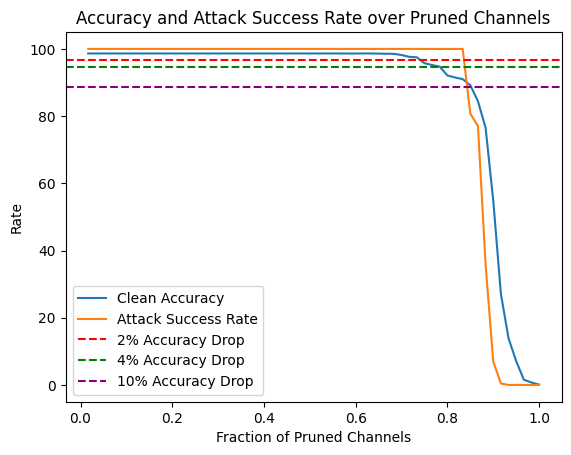

In [11]:
# Create the x-axis for the plot
pruned_channel_fraction = np.arange(1, 61) / 60

# Plotting accuracy and attack success rates
plt.plot(pruned_channel_fraction, accuracy_on_clean_data, label='Clean Accuracy')
plt.plot(pruned_channel_fraction, attack_success_rates, label='Attack Success Rate')

# Adding horizontal lines for accuracy thresholds
peak_accuracy = max(accuracy_on_clean_data)
plt.axhline(peak_accuracy - 2, linestyle='--', color='red', label='2% Accuracy Drop')
plt.axhline(peak_accuracy - 4, linestyle='--', color='green', label='4% Accuracy Drop')
plt.axhline(peak_accuracy - 10, linestyle='--', color='purple', label='10% Accuracy Drop')

plt.legend()
plt.xlabel("Fraction of Pruned Channels")
plt.ylabel("Rate")
plt.title("Accuracy and Attack Success Rate over Pruned Channels")

## GoodNet Models
The GoodNet is our combined model (B and B'). If the preditions from B and B' are same, then the goodnet will output the predition.
If they are different, then the goodnet will output 1283, which is the N+1 class, which means it is a input that is backdoored.

In [12]:
# Defining the G class
class G(keras.Model):
    def __init__(self, B, B_prime):
        super(G, self).__init__()
        self.B = B
        self.B_prime = B_prime

    def predict(self, data):
        y = np.argmax(self.B(data), axis=1)
        y_prime = np.argmax(self.B_prime(data), axis=1)
        pred = np.zeros(data.shape[0])

        for i in range(data.shape[0]):
            if y[i] == y_prime[i]:
                pred[i] = y[i]
            else:
                pred[i] = 1283  # Assigned label for mismatch

        return pred


## Evaluating the repaired and combined models:

In [13]:
# File names for test datasets and models
test_dataset_file = 'test.h5'
poisoned_test_dataset_file = 'bd_test.h5'
model_2_percent_file = 'model_Drop=2.h5'
model_4_percent_file = 'model_Drop=4.h5'
model_10_percent_file = 'model_Drop=10.h5'

# Loading models
model_2_percent_drop = keras.models.load_model(model_2_percent_file)
model_4_percent_drop = keras.models.load_model(model_4_percent_file)
model_10_percent_drop = keras.models.load_model(model_10_percent_file)

# Loading test data
test_images, test_labels = load_dataset(test_dataset_file)
test_poisoned_images, test_poisoned_labels = load_dataset(poisoned_test_dataset_file)

# Displaying shapes of the test datasets
print("Shape of test data: ", test_images.shape)
print("Shape of poisoned test data: ", test_poisoned_images.shape)

# Creating G models for different pruning levels
G_model_2_percent = G(trained_neural_network, model_2_percent_drop)
G_model_4_percent = G(trained_neural_network, model_4_percent_drop)
G_model_10_percent = G(trained_neural_network, model_10_percent_drop)

# Clearing session and collecting garbage to avoid RAM issues
from tensorflow.keras import backend as K
K.clear_session()
import gc
gc.collect()


Shape of test data:  (12830, 55, 47, 3)
Shape of poisoned test data:  (12830, 55, 47, 3)


458

In [14]:
def evaluate_model_performance(model, clean_images, clean_labels, poisoned_images, poisoned_labels, drop_rate):
    clean_predictions = np.argmax(model.predict(clean_images), axis=1)
    clean_accuracy = np.mean(np.equal(clean_predictions, clean_labels)) * 100
    print(f'{drop_rate}% drops model, Clean Test Data Classification Accuracy: {clean_accuracy}')

    poisoned_predictions = np.argmax(model.predict(poisoned_images), axis=1)
    attack_success_rate = np.mean(np.equal(poisoned_predictions, poisoned_labels)) * 100
    print(f'{drop_rate}% drops model, Attack Success Rate: {attack_success_rate}')
    return (clean_accuracy, attack_success_rate)




# Evaluating models with 2%, 4%, and 10% drops
clean_test_2_accuracy, asr_2 = evaluate_model_performance(model_2_percent_drop, test_images, test_labels, test_poisoned_images, test_poisoned_labels, 2)
clean_test_4_accuracy, asr_4 = evaluate_model_performance(model_4_percent_drop, test_images, test_labels, test_poisoned_images, test_poisoned_labels, 4)
clean_test_10_accuracy, asr_10 = evaluate_model_performance(model_10_percent_drop, test_images, test_labels, test_poisoned_images, test_poisoned_labels, 10)


print("\n\nPerformance of Repaired models: \n")
print('Repaired 2% drop model, the clean test data Classification accuracy:', clean_test_2_accuracy)
print('Repaired 2% drops model, Attack Success Rate:', asr_2)

print("------------------------------------------------- \n\n")

print('Repaired 4% drop model, the clean test data Classification accuracy:', clean_test_4_accuracy)
print('Repaired 4% drops model, Attack Success Rate:', asr_4)


print("------------------------------------------------- \n\n")
print('Repaired 10% drop model, the clean test data Classification accuracy:', clean_test_10_accuracy)
print('Repaired 10% drops model, Attack Success Rate:', asr_10)





401/401 [==============================] - 1s 2ms/step
2% drops model, Clean Test Data Classification Accuracy: 95.90023382696803
401/401 [==============================] - 1s 2ms/step
2% drops model, Attack Success Rate: 100.0
401/401 [==============================] - 1s 2ms/step
4% drops model, Clean Test Data Classification Accuracy: 92.29150428682775
401/401 [==============================] - 1s 2ms/step
4% drops model, Attack Success Rate: 99.98441153546376
401/401 [==============================] - 1s 2ms/step
10% drops model, Clean Test Data Classification Accuracy: 84.54403741231489
401/401 [==============================] - 1s 2ms/step
10% drops model, Attack Success Rate: 77.20966484801247


Performance of Repaired models: 

Repaired 2% drop model, the clean test data Classification accuracy: 95.90023382696803
Repaired 2% drops model, Attack Success Rate: 100.0
------------------------------------------------- 


Repaired 4% drop model, the clean test data Classification acc

In [15]:
#Evaluating GoodNets

print("\n\n Performance of GoodNet Models:\n")
G_cl_test_2_label_p = G_model_2_percent.predict(test_images)
G_clean_test_2_accuracy = np.mean(np.equal(G_cl_test_2_label_p, test_labels))*100
print('Combined 2% drops model, the clean test data Classification accuracy:', G_clean_test_2_accuracy)

G_bd_test_2_label_p = G_model_2_percent.predict(test_poisoned_images)
G_asr_2 = np.mean(np.equal(G_bd_test_2_label_p, test_poisoned_labels))*100
print('Combined 2% drops model, Attack Success Rate:', G_asr_2)

print("------------------------------------------------- \n\n")



G_cl_test_4_label_p = G_model_4_percent.predict(test_images)
G_clean_test_4_accuracy = np.mean(np.equal(G_cl_test_4_label_p, test_labels))*100
print('Combined 4% drops model, the clean test data Classification accuracy:', G_clean_test_4_accuracy)

G_bd_test_4_label_p = G_model_4_percent.predict(test_poisoned_images)
G_asr_4 = np.mean(np.equal(G_bd_test_4_label_p, test_poisoned_labels))*100
print('Combined 4% drops model, Attack Success Rate:', G_asr_4)

print("------------------------------------------------- \n\n")



G_cl_test_10_label_p = G_model_10_percent.predict(test_images)
G_clean_test_10_accuracy = np.mean(np.equal(G_cl_test_10_label_p, test_labels))*100
print('Combined 10% drops model, the clean test data Classification accuracy:', G_clean_test_10_accuracy)

G_bd_test_10_label_p = G_model_10_percent.predict(test_poisoned_images)
G_asr_10 = np.mean(np.equal(G_bd_test_10_label_p, test_poisoned_labels))*100
print('Combined 10% drops model, Attack Success Rate:', G_asr_10)





 Performance of GoodNet Models:

Combined 2% drops model, the clean test data Classification accuracy: 95.74434918160561
Combined 2% drops model, Attack Success Rate: 100.0
------------------------------------------------- 


Combined 4% drops model, the clean test data Classification accuracy: 92.1278254091972
Combined 4% drops model, Attack Success Rate: 99.98441153546376
------------------------------------------------- 


Combined 10% drops model, the clean test data Classification accuracy: 84.3335931410756
Combined 10% drops model, Attack Success Rate: 77.20966484801247


In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

def plot_performance(accuracy, attack_rates, model_labels, plot_title):
    # Using a seaborn style for the plot
    sns.set(style="whitegrid")

    # Creating DataFrame
    performance_data = {
        "Test Accuracy": accuracy,
        "Attack Success Rate": attack_rates,
        "Model": model_labels
    }
    df = pd.DataFrame(performance_data)
    df.set_index('Model', inplace=True)
    return df

    # Plotting
#     opacity = 0.7
#     bar_width = 0.35
#     plt.xlabel('Model')
#     plt.ylabel('Rate')
#     plt.xticks(range(len(accuracy)), model_labels)
#     colors = ['skyblue', 'lightcoral']  
#     bar1 = plt.bar(np.arange(len(accuracy)) + bar_width, accuracy, bar_width, alpha=opacity, color=colors[0], label='Accuracy')
#     bar2 = plt.bar(range(len(attack_rates)), attack_rates, bar_width, alpha=opacity, color=colors[1], label='Attack Rate')

   
#     for rect in bar1 + bar2:
#         height = rect.get_height()
#         plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.02f}', ha='center', va='bottom')

#     plt.legend()
#     plt.title(plot_title)
#     plt.tight_layout()
#     plt.show()


In [18]:
print("Repaired Models:")

original_test_acc = [clean_test_2_accuracy, clean_test_4_accuracy, clean_test_10_accuracy]
original_attack_rate = [asr_2, asr_4, asr_10]
df_1 = plot_performance(original_test_acc, original_attack_rate, ["2%", "4%", "10%"], 'Performance of Repaired Model')


df_1

Repaired Models:


,Test Accuracy,Attack Success Rate
Model,,
2%,95.900234,100.000000
4%,92.291504,99.984412
10%,84.544037,77.209665


In [19]:
print("Combined Models:")
# GoodNet model performance
g_test_acc = [G_clean_test_2_accuracy, G_clean_test_4_accuracy, G_clean_test_10_accuracy]
g_attack_rate = [G_asr_2, G_asr_4, G_asr_10]
df_2 = plot_performance(g_test_acc, g_attack_rate, ["G_2%", "G_4%", "G_10%"], 'Performance of GoodNet Model')



df_2

Combined Models:


,Test Accuracy,Attack Success Rate
Model,,
G_2%,95.744349,100.000000
G_4%,92.127825,99.984412
G_10%,84.333593,77.209665
